In [2]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

# Define a function to clean comments
def clean_comment(comment):
    # Remove '\n' characters
    comment = comment.replace('\n', ' ')
    # Convert everything to lowercase
    comment = comment.lower()
    # Remove punctuation
    comment = comment.translate(str.maketrans('', '', string.punctuation))
    # Tokenize the comment into words
    words = word_tokenize(comment)
    # Remove stopwords
    words = [word for word in words if word not in stopwords.words('english')]
    # Lemmatize the words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    # Join the words back into a string
    cleaned_comment = ' '.join(words)
    return cleaned_comment



[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1122)>
[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1122)>
[nltk_data] Error loading wordnet: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1122)>


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Load the data
df = pd.read_csv('/Users/zihanfang/Desktop/car_website_data/data_with_location.csv')
# Clean the data
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)


# Load the data
df_reddit = pd.read_csv('/Users/zihanfang/Desktop/car_website_data/comments_reddit.csv')
# Clean the data
df_reddit.drop_duplicates(inplace=True)
df_reddit.dropna(inplace=True)


# Load the data
df_edmunds = pd.read_csv('/Users/zihanfang/Desktop/car_website_data/reviews_edmunds.csv')

# Clean the data
df_edmunds.drop_duplicates(inplace=True)
df_edmunds.dropna(inplace=True)

df_fan = pd.read_csv('/Users/zihanfang/Desktop/car_website_data/reviews_fanclub.csv')

# Clean the data
df_fan.drop_duplicates(inplace=True)
df_fan.dropna(inplace=True)


# Load the data
df_youtube = pd.read_csv('/Users/zihanfang/Desktop/car_website_data/youtube_comment.csv')
# Clean the data
df_youtube.drop_duplicates(inplace=True)

In [6]:
## Combine the Edmunds and Cars.com
df_car=df.drop(['Title', 'date','author','location'], axis=1)
df_ec = pd.concat([df_car, df_edmunds])
df_ec['Model'] = df_ec['Model'].str.replace('-', '').str.replace('_', '').str.replace('/', '').str.replace('.', '')

/var/folders/b9/xvth5z3d0g725rzpttbd7rc80000gn/T/ipykernel_2999/3787193891.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_ec['Model'] = df_ec['Model'].str.replace('-', '').str.replace('_', '').str.replace('/', '').str.replace('.', '')


In [7]:
#Combine all comments together

df_combined=pd.concat([df_ec.drop(['Year', 'Model'], axis=1),df_reddit.drop(['subreddit'],axis=1)])

df_combined=pd.concat([df_combined,df_fan.drop(['Title','Model'],axis=1)])


In [8]:
df_youtube = df_youtube.rename(columns={'Comment': 'Reviews'})
df_combined_final=pd.concat([df_combined,df_youtube.drop(['Video Title','Model Name'],axis=1)])
df_combined_final.head(5)

,Reviews
0,I BOUGHT A 2018 LEAF SL NEW IN OCTOBER 2018....
1,Wanted to get an EV but very few options offer...
2,I have owned a couple of leafs. This is my fir...
4,I’ve only had it 3 days! Love it! Smooth drivi...
10,I really enjoy driving this car. It is perfect...


In [9]:
nltk.download('omw-1.4')

[nltk_data] Error loading omw-1.4: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1122)>


False

In [12]:
df_combined_final['Reviews'] = df_combined_final['Reviews'].apply(lambda x: clean_comment(x))

In [13]:
df_combined_final.to_csv("combined_comment.csv")

In [48]:
df=pd.read_csv("combined_comment.csv")

In [50]:
len(df['Reviews'] )

277281

In [52]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# Remove any rows with missing values
df.dropna(subset=['Reviews'], inplace=True)
# Convert the comments into a bag-of-words representation
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Reviews'])

# Fit an LDA model to the data
lda = LatentDirichletAllocation(n_components=10, random_state=42)
X_topics = lda.fit_transform(X)


AttributeError: 'numpy.ndarray' object has no attribute 'toarray'

In [81]:

# Use K-means clustering to group the users based on their topic distributions
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X_topics)

KMeans(n_clusters=10, random_state=42)

In [54]:
# Print the top 10 words for each topic
feature_names = vectorizer.get_feature_names()
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic {topic_idx}:")
    top_words_idx = topic.argsort()[::-1][:10] # get the indices of the top 10 words for the topic
    top_words = [feature_names[i] for i in top_words_idx]
    print(top_words)
    print()

Topic 0:
['battery', 'charge', 'range', 'car', 'charging', 'speed', 'mile', 'time', 'heat', '100']

Topic 1:
['charger', 'charging', 'ev', 'charge', 'tesla', 'car', 'station', 'use', 'need', 'make']

Topic 2:
['car', 'mile', 'year', 'ev', 'range', 'drive', 'tire', 'bolt', 'trip', 'time']

Topic 3:
['wheel', 'seat', 'door', 'rear', 'steering', 'button', 'thank', 'got', 'im', 'like']

Topic 4:
['price', 'car', 'like', 'tesla', 'ev', 'people', 'model', 'think', 'kia', 'really']

Topic 5:
['look', 'like', 'car', 'toyota', 'love', 'nice', 'black', 'good', 'interior', 'color']

Topic 6:
['car', 'video', 'driving', 'time', 'like', 'thanks', 'brake', 'mode', 'drive', 'update']

Topic 7:
['truck', 'like', 'ford', 'engine', 'electric', 'hybrid', 'better', 'sound', 'want', 'light']

Topic 8:
['dealer', 'order', 'got', 'dealership', 'month', 'week', 'car', 'delivery', '2022', 'credit']

Topic 9:
['tesla', 'car', 'model', 'screen', 'better', 'like', 'quality', 'phone', 'issue', 'control']



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


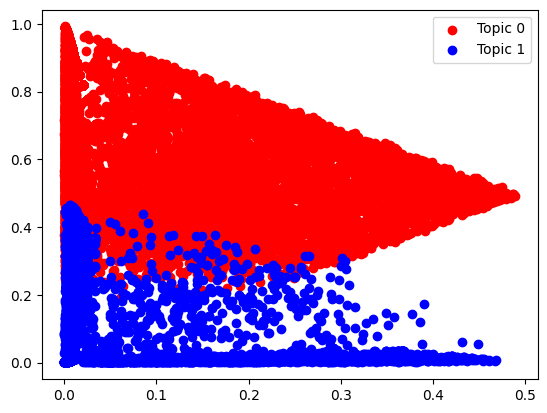

In [82]:
import matplotlib.pyplot as plt

# Define a dictionary of topic names and corresponding label colors
topic_colors = {
    'Topic 0': 'red',
    'Topic 1': 'blue'
}

# Plot the scatter points for each topic with the appropriate color and label
for i, topic in enumerate(topic_colors):
    plt.scatter(X_topics[kmeans.labels_==i, 0], X_topics[kmeans.labels_==i, 1], c=topic_colors[topic], label=topic)

# Add the legend and show the plot
plt.legend()
plt.show()


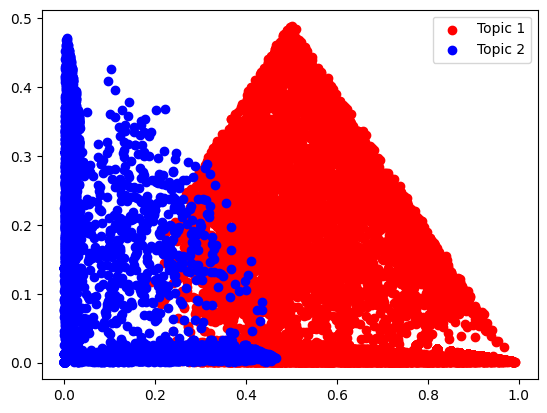

In [83]:
import matplotlib.pyplot as plt

# Define a dictionary of topic names and corresponding label colors
topic_colors = {
    'Topic 1': 'red',
    'Topic 2': 'blue'
}

# Plot the scatter points for each topic with the appropriate color and label
for i, topic in enumerate(topic_colors):
    plt.scatter(X_topics[kmeans.labels_==i, 1], X_topics[kmeans.labels_==i, 2], c=topic_colors[topic], label=topic)

# Add the legend and show the plot
plt.legend()
plt.show()

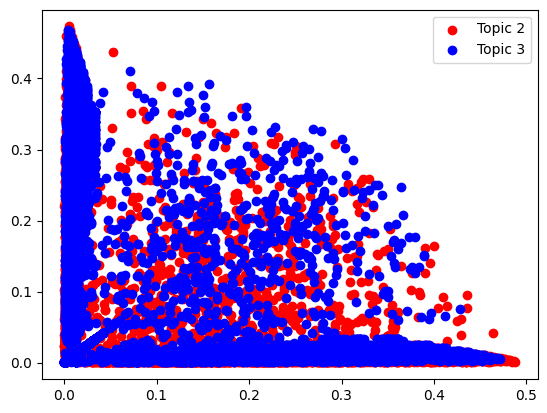

In [84]:
import matplotlib.pyplot as plt

# Define a dictionary of topic names and corresponding label colors
topic_colors = {
    'Topic 2': 'red',
    'Topic 3': 'blue'
}

# Plot the scatter points for each topic with the appropriate color and label
for i, topic in enumerate(topic_colors):
    plt.scatter(X_topics[kmeans.labels_==i, 2], X_topics[kmeans.labels_==i, 3], c=topic_colors[topic], label=topic)

# Add the legend and show the plot
plt.legend()
plt.show()

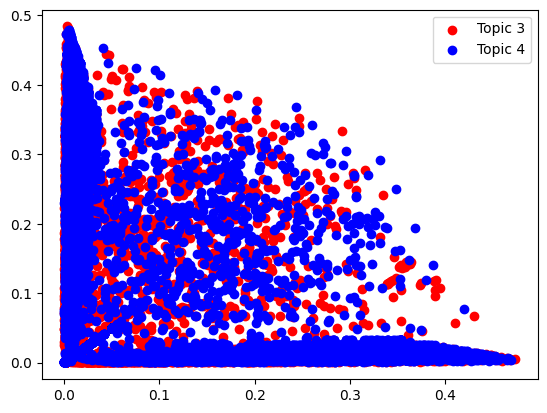

In [85]:
import matplotlib.pyplot as plt

# Define a dictionary of topic names and corresponding label colors
topic_colors = {
    'Topic 3': 'red',
    'Topic 4': 'blue'
}

# Plot the scatter points for each topic with the appropriate color and label
for i, topic in enumerate(topic_colors):
    plt.scatter(X_topics[kmeans.labels_==i, 3], X_topics[kmeans.labels_==i, 4], c=topic_colors[topic], label=topic)

# Add the legend and show the plot
plt.legend()
plt.show()

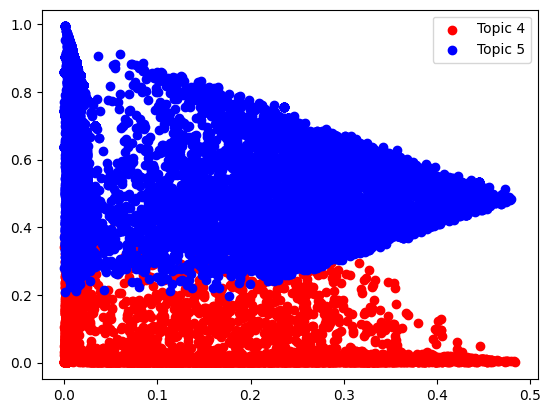

In [86]:
import matplotlib.pyplot as plt

# Define a dictionary of topic names and corresponding label colors
topic_colors = {
    'Topic 4': 'red',
    'Topic 5': 'blue'
}

# Plot the scatter points for each topic with the appropriate color and label
for i, topic in enumerate(topic_colors):
    plt.scatter(X_topics[kmeans.labels_==i, 4], X_topics[kmeans.labels_==i, 5], c=topic_colors[topic], label=topic)

# Add the legend and show the plot
plt.legend()
plt.show()

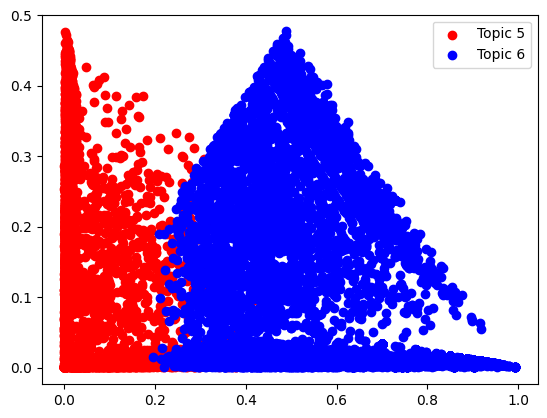

In [87]:
import matplotlib.pyplot as plt

# Define a dictionary of topic names and corresponding label colors
topic_colors = {
    'Topic 5': 'red',
    'Topic 6': 'blue'
}

# Plot the scatter points for each topic with the appropriate color and label
for i, topic in enumerate(topic_colors):
    plt.scatter(X_topics[kmeans.labels_==i, 5], X_topics[kmeans.labels_==i, 6], c=topic_colors[topic], label=topic)

# Add the legend and show the plot
plt.legend()
plt.show()

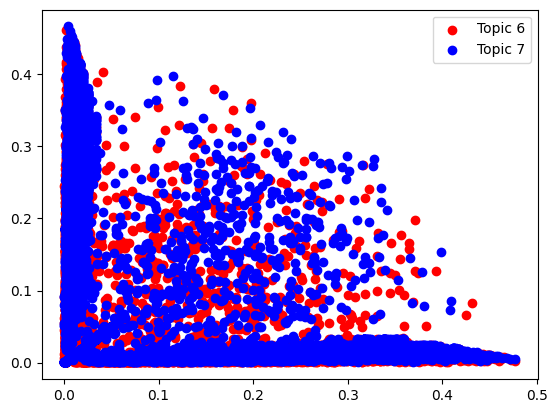

In [88]:
import matplotlib.pyplot as plt

# Define a dictionary of topic names and corresponding label colors
topic_colors = {
    'Topic 6': 'red',
    'Topic 7': 'blue'
}

# Plot the scatter points for each topic with the appropriate color and label
for i, topic in enumerate(topic_colors):
    plt.scatter(X_topics[kmeans.labels_==i, 6], X_topics[kmeans.labels_==i, 7], c=topic_colors[topic], label=topic)

# Add the legend and show the plot
plt.legend()
plt.show()